In [1]:
import pandas as pd
import numpy as np
import seaborn
from nltk.corpus import stopwords
from itertools import chain
from nltk.probability import FreqDist

In [6]:
data_read=pd.read_csv("Digital_marketing_usa.csv",delimiter=",",header=0)

In [7]:
data_read.head()

,ville,utituler_offre,entreprise,localisation,resume,description
0,New+York,Digital Marketing Media Operations,JP Morgan Chase,NaN,"Background in digital marketing, audience crea...",The Chase In-House Media team supports the man...
1,New+York,"Manager, Digital Marketing",Sony Music Entertainment,NaN,1.5 - 2 years digital content management exper...,Overview\nSony Music Entertainment is a global...
2,New+York,Global Media and Social Marketing Coordinator ...,Hewlett Packard Enterprise,NaN,Maintain company marketing management systems ...,"At HPE, we bring together the brightest minds ..."
3,New+York,"Manager, Digital Marketing and Strategy",Live Nation,NaN,"Manager, Digital Marketing and Strategy. We're...","Job Summary:\nTitle: Manager, Digital Marketin..."
4,New+York,Marketing Coordinator,NBCUniversal,NaN,Sub-BusinessAd Sales Marketing. Experience wor...,Job Purpose\n\nReporting to the Director of Ad...


In [8]:
data_read.shape

(28636, 6)

In [9]:
# enlever ponctuation
data_read["resume"]= data_read["resume"].str.replace('[^\w\s]','')
data_read["description"]=data_read["description"].str.replace('[^\w\s]','')
# transformer les lettres en minuscule:
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))
# enlever stopword 
stop = stopwords.words('english')
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))

## Analyse descriptif des données

In [10]:
from collections import Counter
import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')
def word_count_text(List_text,N_min=7500,tokenizer_true=False):
    der="".join(List_text)
    tokens = nltk.word_tokenize(" ".join(List_text))
    fdist=FreqDist(tokens)
    ## Compter le nombre d'occurence des mots
    dict_word=dict(fdist)
    # On enregistre les mots dans un dataframe
    pd_dict_word=pd.DataFrame(list(dict_word.values()),index=dict_word.keys(),columns=["occurence"])
    pd_dict_word=pd_dict_word.sort_values(by="occurence",ascending=False)
    ## On filtre les mots dont l'occurence sont supérieurs à N_min
    pd_dict_word=pd_dict_word.loc[pd_dict_word.occurence>N_min,:]
    # on retourne un dataframe
    return pd_dict_word

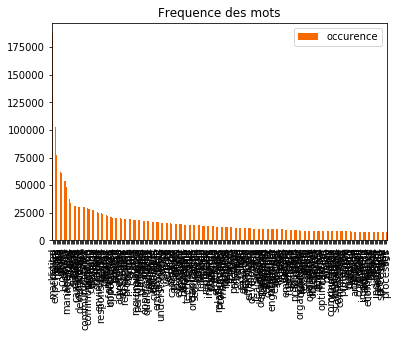

In [11]:
description=data_read.description.tolist()
pd_dict_word= word_count_text(description)
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');

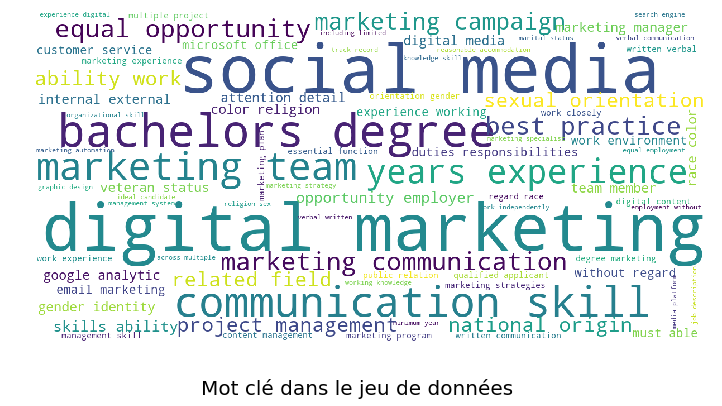

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
comment_words =""
for single in data_read['description']:
    comment_words = str(comment_words)
    comment_words += single
stopwords = set(STOPWORDS) 
def show_wordcloud(data,stopwords=stopwords,title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

## word clue:
Dans cette partie, on va étudier les mots clés que l'on considère être des mots  clés connus dans le domaine de la data science. On va tout d'abord étudier les mots liés au outils utilisés dans le domaine de la data science. Pour le logiciel r on va mettre des espaces avant et après la lettre r pour ne pas considérer les lettres r dans d'autres mots.

In [13]:
Mot_cle_technique = ['python','r',"html","css",'sql','java','scala','excel',"ruby",
        'aws','hadoop','spark','linux','tableau',"nosql","Oracle","etl","crm",
               'linux','sas','hive','oracle','perl',"informatica",'Cognos',"hbase",
               'mysql','html','sap','spss','mongodb',"c++","postgresql","pig"]

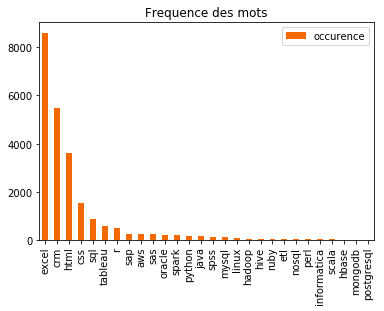

In [14]:
pd_dict_word_all=word_count_text(description,N_min=0)
bol=[True if k in Mot_cle_technique else False for k in pd_dict_word_all.index ]
mot_outils=pd_dict_word_all[bol]
mot_outils.plot(kind='bar', color="#f56900", title='Frequence des mots');

## Filtre que sur les postes de data :

In [19]:
bolean=[ True if "digital" in k.lower()  in k.lower() else False for k in data_read.utituler_offre]

In [20]:
data_filtered=data_read[bolean]

In [22]:
data_filtered.head()

,ville,utituler_offre,entreprise,localisation,resume,description
0,New+York,Digital Marketing Media Operations,JP Morgan Chase,NaN,background digital marketing audience creation...,chase inhouse media team supports management a...
1,New+York,"Manager, Digital Marketing",Sony Music Entertainment,NaN,15 2 years digital content management experien...,overview sony music entertainment global recor...
3,New+York,"Manager, Digital Marketing and Strategy",Live Nation,NaN,manager digital marketing strategy seeking man...,job summary title manager digital marketing st...
5,New+York,"Specialist, Digital Marketing, Arista Records",Sony Music Entertainment,NaN,least 2 years work experience digital marketin...,overview sony music entertainment global recor...
6,New+York,Digital Marketing Manager,Hyatt,NaN,digital marketing manager manage digital marke...,return search digital marketing manager beekma...


## Revisualisation des données:

In [27]:
description=data_filtered.description.tolist()
pd_dict_word= word_count_text(description,N_min=10000)

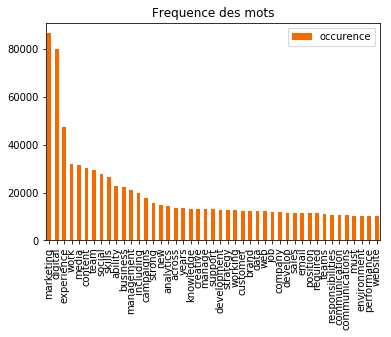

In [28]:
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');

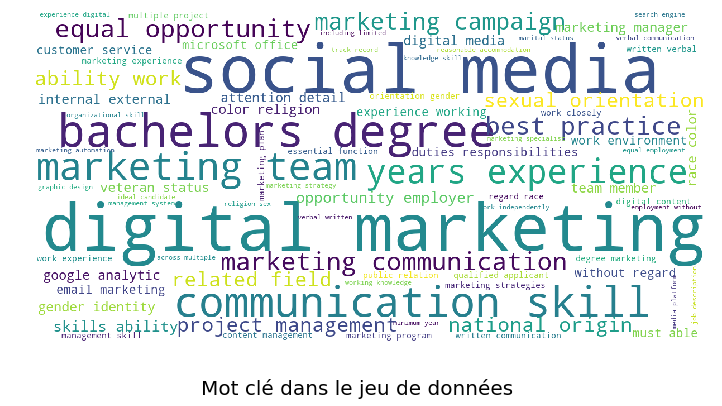

In [25]:
comment_words =""
for single in data_read['description']:
    comment_words = str(comment_words)
    comment_words += single
show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

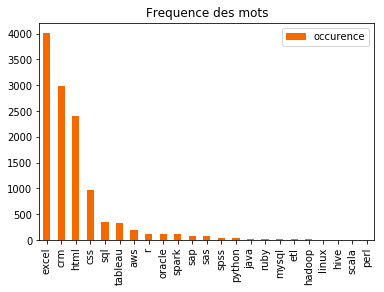

In [26]:
pd_dict_word_all=word_count_text(description,N_min=0)
bol=[True if k in Mot_cle_technique else False for k in pd_dict_word_all.index ]
mot_outils=pd_dict_word_all[bol]
mot_outils.plot(kind='bar', color="#f56900", title='Frequence des mots');

In [29]:
data_filtered.to_csv("digital_marketing_filtered.csv",index=False)

In [30]:
data_filtered.shape

(12088, 6)